# Hierarchical Clustering 

In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
#it is used to calculate distance and to get dendrograms
from sklearn.cluster import AgglomerativeClustering
#to cut trees and to form clusters
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
univ=pd.read_csv("C:\\Users\\CHANDU\\Downloads\\Universities.csv")
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

minimum value will take 0 and maximum value will take 1

standardizing is converting into z-scores

normalizing is converting scale between 0 and 1

if we have categorical data then first we should use normalization and then standardization

if we have numerical data then we can use either normalization or standardization

In [4]:
#Normalization data frame(considering the numerical part of data)
df_norm=norm_func(univ.iloc[:,1:])
#here we removed column 0 that is universities which need to cluster
#so all the columns taken from 1 and applying norm function on it
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


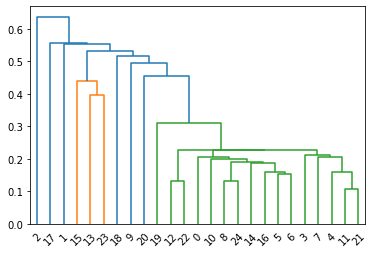

In [5]:
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

here sch is scipy cluster hierarchy

without dendrogram we cannot identify how many number of clusters formed

sch.linkage(df_norm gives the data that we normalized above and method='single') gives which kind of linkage method we use

sch.linkage(df_norm,method='single') is the one method to calculate distance

single linkage does not seems to be work better so we try other linkage methods

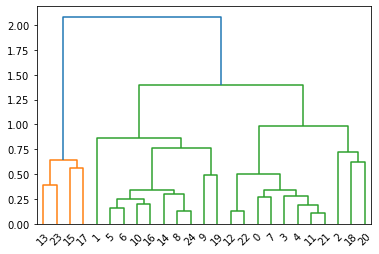

In [6]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

3 clusters formed

where the cluster starts from 0 it is 1st cluster that is 0th index and from 1 it is 2nd cluster starts i.e 1st index and 3rd cluster starts from 13th i.e 2nd index

In [7]:
#create cluster
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')


In [8]:
#save clusters forchart
y_hc=hc.fit_predict(df_norm)
#clusters=pd.DataFrame(y_hc,columns=['clusters'])
y_hc

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [12]:
y_hc

{}

In [14]:
df_norm['h_clusterid']=pd.Series(list(y_hc))
df_norm

<ipython-input-14-93a5f7f563f2>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_norm['h_clusterid']=pd.Series(list(y_hc))


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,NaN
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,NaN
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,NaN
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,NaN
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,NaN
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,NaN
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,NaN
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,NaN
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,NaN
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,NaN


In [15]:
univ['h_clusterid']=pd.Series(y_hc)
univ

<ipython-input-15-686d18d039aa>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  univ['h_clusterid']=pd.Series(y_hc)


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,NaN
1,CalTech,1415,100,25,6,63575,81,NaN
2,CMU,1260,62,59,9,25026,72,NaN
3,Columbia,1310,76,24,12,31510,88,NaN
4,Cornell,1280,83,33,13,21864,90,NaN
5,Dartmouth,1340,89,23,10,32162,95,NaN
6,Duke,1315,90,30,12,31585,95,NaN
7,Georgetown,1255,74,24,12,20126,92,NaN
8,Harvard,1400,91,14,11,39525,97,NaN
9,JohnsHopkins,1305,75,44,7,58691,87,NaN


In [16]:
#cluster can be done by using group id
result=univ.iloc[:,1:].groupby(univ.h_clusterid).mean()
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,


# Non Hierarchical Clustering

# K-Means Clustering 

In [17]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [18]:
Univ=pd.read_csv("C:\\Users\\CHANDU\\Downloads\\Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [19]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [21]:
kmeans_clust=KMeans(n_clusters=3)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [22]:
k = list(range(2,8))
k

[2, 3, 4, 5, 6, 7]

In [23]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([9.18208121]),
 array([7.83900446]),
 array([6.88239516]),
 array([6.1217958]),
 array([5.50071942]),
 array([5.02197857])]

([<matplotlib.axis.XTick at 0x1ddf538d400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

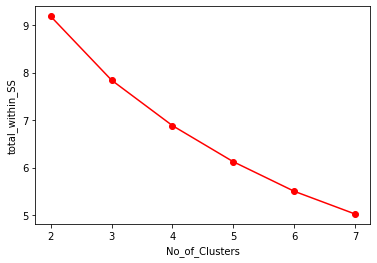

In [24]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)